In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
Rest_data=pd.read_excel(r'decision tree/Data_Train.xlsx')

In [4]:
Rest_data_test=pd.read_excel(r'decision tree/Data_Test.xlsx')

### EDA

In [5]:
Rest_data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [6]:
Rest_data.shape

(12690, 9)

In [7]:
Rest_data_test.shape

(4231, 8)

In [8]:
Rest_data['COST'].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [9]:
Rest_data_test['COST']=1

In [10]:
Rest_data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,1
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,1
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,1
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,1
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,1


Here we are merging both Train and Test data. At the time of model preparation we will separate train data from merged Dataset

In [11]:
rest_data=pd.concat([Rest_data,Rest_data_test])

In [12]:
rest_data.shape

(16921, 9)

12690 train rows + 4231 test rows

In [13]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Obs: Dataset has 8 attributes , COST and Restaurant_id is int type and rest all are object type

#### Checking for null values

In [14]:
Rest_data.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Obs: CITY, LOCALITY,RATING and VOTES have null values

##  Data Preprocessing

In [15]:
#checking unique values
for i in ['CITY','RATING','LOCALITY','VOTES']:
    print('\n',Rest_data[i].unique())
#creating a copy of original train dataset for data analysis
#rest_data=Rest_data.copy()


 ['Thane' 'Chennai' 'Mumbai' 'Bangalore' 'Gurgaon' 'Hyderabad' 'Kochi'
 'Thane West' 'Andheri Lokhandwala' 'New Delhi' 'Andheri West'
 'Malad East' '682036' 'Bangalor' 'Navi Mumbai' 'Bandra West' 'Delhi'
 'Noida' 'Bangalore-560066' 'Secunderabad' nan 'India' 'Madhuranagar'
 'Chennai Teynampet' 'Faridabad' 'Chembur.' 'Maharashtra'
 'opp gurudwara Shakurpur' 'Telagana Land Line:040-48507016' 'Ghaziabad'
 'Karnataka' 'Kerala' 'Edappally' 'Kadavanthra' 'Ernakulam Circle kochi'
 'Bengalore' 'Near Reliance Fresh' 'Kilpauk' 'Bengaluru' 'Kothaguda'
 'Goregaon West' 'Banglore' 'Tamil Nadu' 'Kakkanad' 'Kochi Elamkulam'
 'Outer Ring Road' 'Mulund East'
 'Secunderabad main road near signal NMREC COLLEGE' 'Telangana'
 'Ponnuruni Kochi' 'Gachibowli' 'Semmancheri'
 '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034'
 'Mumbai Mahim' 'Powai (Next to Powai Plaza)' 'Dombivali East'
 'Kochi Vyttila' 'Kandivali' 'Kochi Palarivattom' 'Dewan Rama Road'
 'Gurugram' 'Sector 51 Noida' 'Kaloor' 'Bes

#### Dealing with null values

In [16]:
#### filling null cities with 'CITYNA'
rest_data['CITY'].fillna('CITY_NA',inplace=True)

#### filling null Locality with 'LOCALITYNA'
rest_data['LOCALITY'].fillna('LOCALITY_NA',inplace=True)

#### DEALING WITH RATING
##   First converting all irrelevant values to '0' and then converting to float
rest_data['RATING'].replace('NEW','0',inplace=True)
rest_data['RATING'].replace('-','0',inplace=True)
rest_data['RATING'].fillna('0',inplace=True)
rest_data['RATING']=rest_data['RATING'].astype(float)
rest_data['RATING'].replace('0',rest_data['RATING'].mean(),inplace=True)

##### DEALING WITH VOTES:
##    First replacing string 'votes' in VOTES with ''
rest_data['VOTES'].replace(regex=['votes'],value="",inplace=True)
##    filling null values with '0'
rest_data['VOTES'].fillna('0',inplace=True)
##    Removing leading and tailing spaces
rest_data['VOTES']=rest_data['VOTES'].str.strip()
##    converting votes to float
rest_data['VOTES']=rest_data['VOTES'].astype('int')
##    replacing '0' with mean value
rest_data['VOTES'].replace(0,rest_data['VOTES'].mean(),inplace=True)
rest_data['VOTES']=rest_data['VOTES'].astype('int')

In [17]:
rest_data.isna().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Null value removed from dataset

In [18]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16921 non-null  object 
 5   LOCALITY       16921 non-null  object 
 6   RATING         16921 non-null  float64
 7   VOTES          16921 non-null  int32  
 8   COST           16921 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 1.2+ MB


In [19]:
#### Convrting all string columns to upper case just to ensure that we each value of a attribute in the same case everywhere
for i in rest_data.columns:
    if(rest_data.dtypes[i]=='O'):
        rest_data[i]=rest_data[i].str.upper()

### Feature engineering

In [20]:
### finding maximum number of strings in TITLE separated by ',' in TITLE, CUISINES and LOCALITY
for k in ['TITLE','CUISINES','CITY','LOCALITY']:
    
    l=0
    for i in (rest_data[k].to_list()):
        le=len(i.split(','))
        if(le > l):
            l=le
    print(k,' has maximum ',l,' strings')

TITLE  has maximum  2  strings
CUISINES  has maximum  8  strings
CITY  has maximum  1  strings
LOCALITY  has maximum  1  strings


In [21]:
rest_data_=rest_data.copy()

#### Working on 'TITLE'

In [22]:
##### Dividing "TITLE" into 2 parts separated by ',' and making separate columns for each part
rest_data_['TITLE']=rest_data_['TITLE'].str.split(',')
rest_data_['TITLE_1']=rest_data_['TITLE'].str[0]
rest_data_['TITLE_2']=rest_data_['TITLE'].str[1]
rest_data_['TITLE_1'].fillna('NONE',inplace=True)
rest_data_['TITLE_2'].fillna('NONE',inplace=True)
rest_data_['TITLE_1']=rest_data_['TITLE_1'].str.strip()
rest_data_['TITLE_2']=rest_data_['TITLE_2'].str.strip()

#### Working on 'CUISINES'

In [23]:
##### Dividing "CUISINES" into 8 parts separated by ',' and making separate columns for each part
rest_data_['CUISINES']=rest_data_['CUISINES'].str.split(',')
for j,k in zip(range(8),['CUISINES_1','CUISINES_2','CUISINES_3','CUISINES_4','CUISINES_5','CUISINES_6','CUISINES_7','CUISINES_8']):
    rest_data_[k]=rest_data_['CUISINES'].str[j]
    rest_data_[k]=rest_data_[k].str.strip()
    rest_data_[k].fillna('CUISINE_NA',inplace=True)

#### Working on 'TIME'

In [24]:
#### We will only consider number of days the restaurant is open, in our analysis
rest_data_['TIME']=rest_data_['TIME'].str.split('(').str[1]
rest_data_['TIME']=rest_data_['TIME'].str.split(')').str[0]
rest_data_['TIME']=rest_data_['TIME'].str.strip()
rest_data_['TIME'].fillna('MON-SUN',inplace=True)
Days=[]
for i in rest_data_['TIME'].to_list():
    if(len(i.split(','))>1):
        Days.append(len(i.split(',')))
    else:
        if(i=='MON-SUN'):           
            Days.append('7')
        elif(i=='MON-SAT'):
            Days.append('6')
        elif(i=='MON-FRI'):
            Days.append('5')
        elif(i=='MON-THU'):
            Days.append('4')
        elif(i=='MON-WED'):
            Days.append('3')
        elif(i=='MON-TUE'):
            Days.append('2')
        else:
            Days.append('1')
rest_data_['Days']=Days
rest_data_['Days']=rest_data_['Days'].astype('int')

In [25]:
rest_data_['Days'].unique()

array([7, 6, 1, 5, 4, 2, 3])

In [26]:
# dropping TITLE and CUSINES and TIME columns since we have already converted them:
rest_data_.drop(['TITLE','CUISINES','TIME'],inplace=True,axis=1)

<AxesSubplot:>

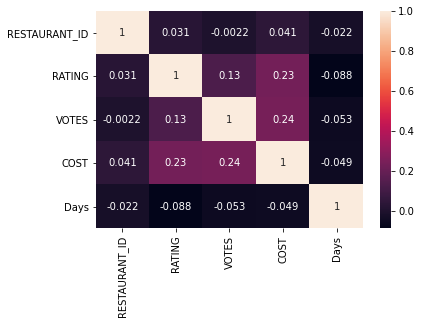

In [27]:
### separating original training dataset for data analysis
df_train=rest_data_.iloc[0:12689,:]
import seaborn as sb
sb.heatmap(df_train.corr(),annot=True)

Obs: Rating and votes are positively correlated with COST

In [28]:
df_train.describe()

,RESTAURANT_ID,RATING,VOTES,COST,Days
count,12689.000000,12689.000000,12689.000000,12689.000000,12689.000000
mean,7759.238868,3.426298,412.168965,655.256600,6.591930
std,4505.036218,1.179845,801.845794,627.028056,1.255097
min,0.000000,0.000000,4.000000,20.000000,1.000000
25%,3863.000000,3.400000,64.000000,300.000000,7.000000
50%,7741.000000,3.800000,200.000000,500.000000,7.000000
75%,11689.000000,4.000000,405.000000,800.000000,7.000000
max,15573.000000,4.900000,41186.000000,14000.000000,7.000000


OBS: There are restaurants wit 0 Rating and maximum 4.9 Rating

Minimum Votes received are 4 and max are 41186.

Large range between 75% and maximum value of VOTES which indicated VOTES have outliers

More than 75% values lie within one S.D of VOTES

Large range between 75% and max values for COST means it has outliers

MOre than 75% values lie within 1 S.D of COST

#### Univariate Analysis

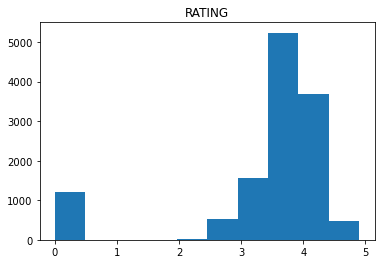

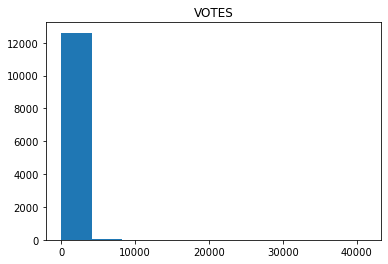

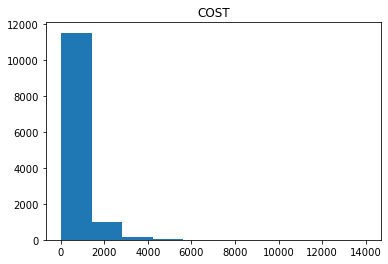

In [29]:
c=['RATING','VOTES','COST']
for i in c:
    plt.subplots()
    plt.hist(df_train[i])
    plt.title(i)

Obs: Approx 1000 Restaurants are with rating between 0 to 5

Maximum Restaurants are having Rating between 3.5 to 4.5

99% votes are between 0 to 5000

90% Restaurant's have cost between 0 to 1000

QUICK BITES      4337
CASUAL DINING    4121
Name: TITLE_1, dtype: int64


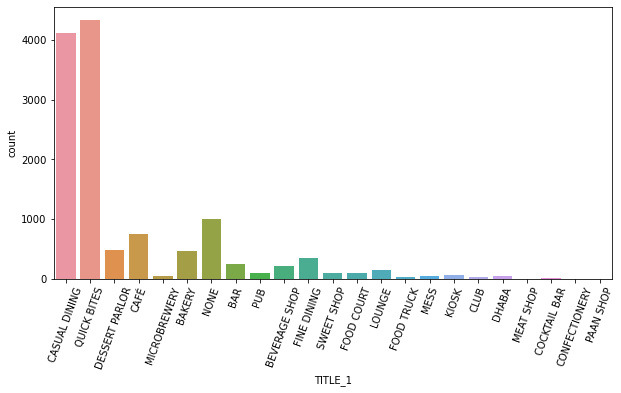

In [30]:
#### viewing count of TITLE
plt.figure(figsize=(10,5))
sb.countplot(x='TITLE_1',data=df_train)
plt.xticks(rotation=70)
print(df_train['TITLE_1'].value_counts().head(2))

OBS: Maximum restaurants are of Quick BYtes followed by Casual Dining

NONE    11207
BAR       428
Name: TITLE_2, dtype: int64


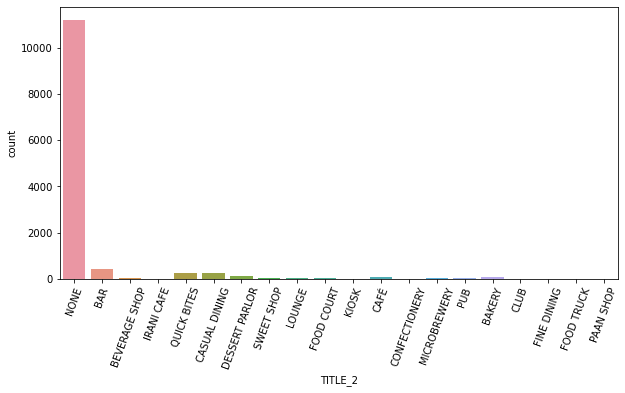

In [31]:
#### viewing count of TITLE
plt.figure(figsize=(10,5))
sb.countplot(x='TITLE_2',data=df_train)
plt.xticks(rotation=70)
print(df_train['TITLE_2'].value_counts().head(2))

90% of values in TITLE_2 are NONE

Maximum values in TITLE_2 is BAR

NORTH INDIAN    3128
SOUTH INDIAN    1241
CHINESE          996
FAST FOOD        762
CAFE             713
Name: CUISINES_1, dtype: int64


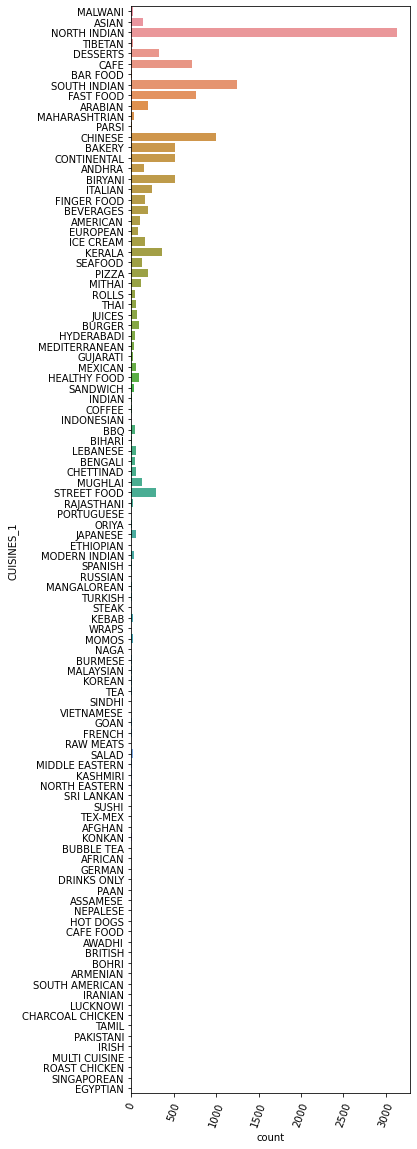

In [32]:
#### viewing count of CUISINE
plt.figure(figsize=(5,20))
sb.countplot(y='CUISINES_1',data=df_train)
plt.xticks(rotation=70)
print(df_train['CUISINES_1'].value_counts().head(5))

OBS: Maximum restaurant offer North Indian type food followed by south indian and Chinese type

CUISINE_NA      3062
CHINESE         1829
NORTH INDIAN    1373
FAST FOOD        782
SOUTH INDIAN     638
Name: CUISINES_2, dtype: int64


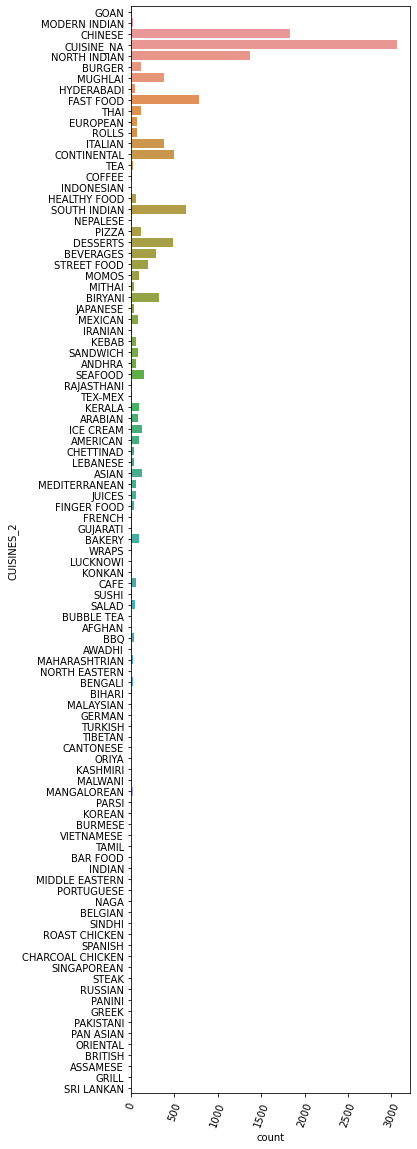

In [33]:
#### viewing count of CUISINE
plt.figure(figsize=(5,20))
sb.countplot(y='CUISINES_2',data=df_train)
plt.xticks(rotation=70)
print(df_train['CUISINES_2'].value_counts().head(5))

Maximum values are NOT AVAILABLE and we have chinese and North Indian values as second largest values

           CITY
CHENNAI    2175
BANGALORE  2149
HYDERABAD  1819
MUMBAI     1722
NEW DELHI  1321


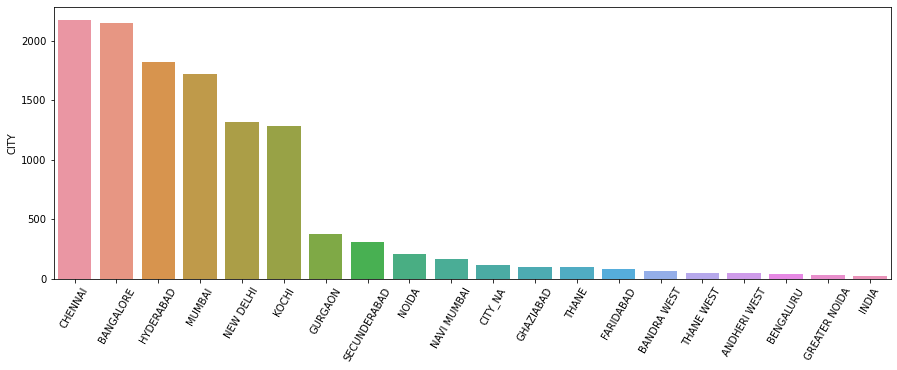

In [34]:
#### Taking count of top 20 city
plt.figure(figsize=(15,5))
fd=pd.DataFrame(df_train['CITY'].value_counts().head(20))
sb.barplot(y='CITY',x=fd.index,data=fd)
plt.xticks(rotation=60)
print(fd.head())

Maximum Restaurants are in chennai and Bangalore followed by Hyderabad,Mumbai and Kochi

7    86.603625
6     3.845548
1     3.167849
5     2.947203
4     2.261623
2     0.606777
3     0.559496
Name: Days, dtype: float64


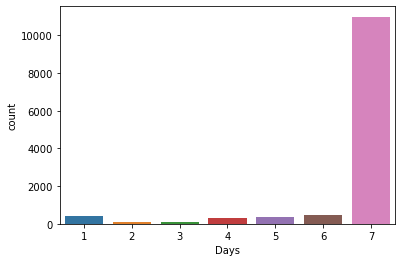

In [35]:
sb.countplot(x='Days',data=df_train)
print((df_train['Days'].value_counts().head(7)/12690)*100)

86.6 % of restaurants are open for all 7 days

less than 5 % restaurants are open for days ranging from 1 to 6

#### Bivariate Analysis

In [36]:
df_train.groupby('TITLE_1').mean()[['RATING','VOTES','COST']].sort_values('RATING',ascending=False).head()

,RATING,VOTES,COST
TITLE_1,,,
MICROBREWERY,4.236364,2348.340909,1619.318182
FINE DINING,4.111429,565.005714,2929.000000
PUB,4.019417,1186.233010,1509.223301
LOUNGE,4.006494,1165.103896,1767.532468
BAR,3.790157,744.255906,1468.700787


OBS: Restaurants with CUISINE MICROBREWERY have highest mean Rating of 4.2 and highest Votes wigth mean 2449.20

Fine Dining restaurants has highest mean Cost 

<AxesSubplot:xlabel='RATING', ylabel='COST'>

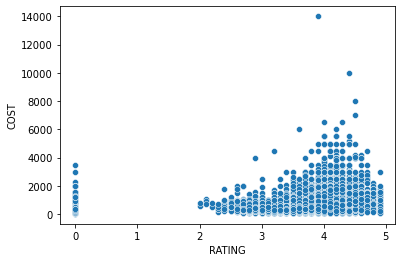

In [37]:
sb.scatterplot(x='RATING',y='COST',data=df_train)

No restaurants are having rating between 0 and 2

Restaurants have higher cost have rating  around 4

In [53]:
rest_data_coded=rest_data_.copy()

In [54]:
rest_data_coded.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,Days
0,9438,THANE,DOMBIVALI EAST,3.6,49,1200,CASUAL DINING,NONE,MALWANI,GOAN,NORTH INDIAN,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,7
1,13198,CHENNAI,RAMAPURAM,4.2,30,1500,CASUAL DINING,BAR,ASIAN,MODERN INDIAN,JAPANESE,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,7
2,10915,CHENNAI,SALIGRAMAM,3.8,221,800,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,7
3,6346,MUMBAI,BANDRA WEST,4.1,24,800,QUICK BITES,NONE,TIBETAN,CHINESE,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,7
4,15387,MUMBAI,LOWER PAREL,3.8,165,300,DESSERT PARLOR,NONE,DESSERTS,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,CUISINE_NA,7


In [56]:
rest_data_coded['CUISINES_7'].value_counts()

CUISINE_NA        16671
                     61
DESSERTS             18
BEVERAGES            15
SALAD                15
PIZZA                13
ITALIAN               9
MOMOS                 8
CHINESE               8
SANDWICH              7
BBQ                   6
NORTH INDIAN          6
BURGER                5
KEBAB                 5
BAKERY                4
HEALTHY FOOD          4
STEAK                 4
TEA                   3
SEAFOOD               3
CONTINENTAL           3
EUROPEAN              3
BURMESE               3
COFFEE                3
SOUTH INDIAN          3
LUCKNOWI              2
VIETNAMESE            2
BIRYANI               2
MUGHLAI               2
LEBANESE              2
MODERN INDIAN         2
GRILL                 2
AMERICAN              2
KERALA                1
MEXICAN               1
MALWANI               1
JUICES                1
INDONESIAN            1
JAPANESE              1
DUMPLINGS             1
SPANISH               1
ROLLS                 1
ASIAN           

In [57]:
rest_data_coded['CUISINES_8'].value_counts()

CUISINE_NA        16813
                     77
FAST FOOD             4
DESSERTS              4
BEVERAGES             2
ICE CREAM             2
SALAD                 2
ASIAN                 2
ROLLS                 1
GRILL                 1
JUICES                1
HEALTHY FOOD          1
BURGER                1
NORTH INDIAN          1
MOMOS                 1
CAFE FOOD             1
MEXICAN               1
LEBANESE              1
FISH AND CHIPS        1
EUROPEAN              1
PIZZA                 1
CHINESE               1
COFFEE AND TEA        1
Name: CUISINES_8, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le_cu=[]
k=0
for i,k in zip(range(8,16),range(8)):
    le_cu.append(LabelEncoder())
    le_cu[k].fit(rest_data_coded.iloc[:,i])
    rest_data_coded.iloc[:,i]=le_cu[k].transform(rest_data_coded.iloc[:,i])

In [59]:
colmns=['CITY','LOCALITY','TITLE_1','TITLE_2']
le=[]
dic_list=[]
for i,k in zip(range(4),colmns):
    le.append(LabelEncoder())
    le[i].fit(rest_data_coded[k])
    rest_data_coded[k]=le[i].transform(rest_data_coded[k])
    
    #dic_list.append()

In [60]:
rest_data_coded.drop(['RESTAURANT_ID'],axis=1,inplace=True)

#### Dealing with Outliers:

In [77]:
from scipy.stats import zscore
df_mod=rest_data_coded.iloc[0:12689,:]
z=abs(zscore(df_mod))
### separating original train dataset from here
rest_data_no_outliers=df_mod[(z<3).all(axis=1)]
print(df_mod.shape)
print(rest_data_no_outliers.shape)
print(df_mod.shape[0]-rest_data_no_outliers.shape[0], 'rows removed as outliers')

(12689, 16)
(10347, 16)
2342 rows removed as outliers


In [78]:
rest_data_no_outliers.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,Days
0,408,320,3.6,49,1200,5,16,61,33,72,24,21,20,15,7,7
2,75,1261,3.8,221,800,5,16,74,23,14,35,21,20,15,7,7
3,281,149,4.1,24,800,23,16,102,23,26,24,21,20,15,7,7
4,281,701,3.8,165,300,9,16,30,26,26,24,21,20,15,7,7
5,281,1565,4.0,550,800,5,16,74,23,84,11,21,20,15,7,7


In [79]:
rest_data_no_outliers['CUISINES_6'].value_counts()

20    10306
10       10
23        8
21        6
34        4
30        2
19        2
17        2
7         1
29        1
28        1
12        1
27        1
11        1
8         1
Name: CUISINES_6, dtype: int64

In [80]:
rest_data_no_outliers.skew()

CITY           0.266924
LOCALITY       0.347508
RATING        -2.072330
VOTES          2.765229
COST           2.117812
TITLE_1       -0.076628
TITLE_2       -4.722336
CUISINES_1    -0.058141
CUISINES_2     0.898909
CUISINES_3     1.943597
CUISINES_4     3.415746
CUISINES_5     1.348938
CUISINES_6    -0.301854
CUISINES_7   -27.477574
CUISINES_8     0.000000
Days          -3.941123
dtype: float64

In [81]:
np.cbrt(rest_data_no_outliers['CUISINES_3']).skew()

0.8546279597661567

In [82]:

for i in rest_data_no_outliers.columns:
    if(((rest_data_no_outliers[i].skew())< -0.55) & (i!='COST')):
        rest_data_no_outliers[i]=np.e**(rest_data_no_outliers[i])
    if(((rest_data_no_outliers[i].skew())> 0.55) & (i!='COST')):
        rest_data_no_outliers[i]=(rest_data_no_outliers[i])**(1/4)
rest_data_no_outliers['COST']=np.log(rest_data_no_outliers['COST'])
rest_data_no_outliers.skew()

CITY           0.266924
LOCALITY       0.347508
RATING         0.194702
VOTES          0.415817
COST           0.242147
TITLE_1       -0.076628
TITLE_2        1.443204
CUISINES_1    -0.058141
CUISINES_2    -0.177319
CUISINES_3     0.459350
CUISINES_4    -1.788995
CUISINES_5   -11.511014
CUISINES_6    -0.301854
CUISINES_7     3.161769
CUISINES_8     0.000000
Days          -2.981434
dtype: float64

Most skewness is handled

### Note: Here we have modified our target attribute with the log hence we have to take anti log at the time of actual prediction

<AxesSubplot:ylabel='Density'>

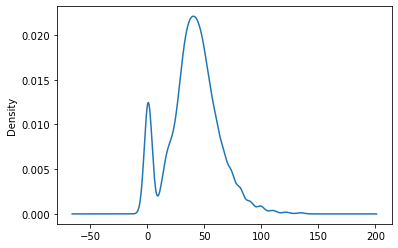

In [83]:
rest_data_no_outliers['RATING'].plot(kind='kde')

In [85]:
rest_data_no_outliers.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,Days
0,408,320,36.598234,2.645751,7.090077,5,54.59815,61,2.396782,2.912951,2.213364,2.140695,20,42.521082,7,1096.633158
2,75,1261,44.701184,3.855654,6.684612,5,54.59815,74,2.189939,1.934336,2.432299,2.140695,20,42.521082,7,1096.633158
3,281,149,60.340288,2.213364,6.684612,23,54.59815,102,2.189939,2.258101,2.213364,2.140695,20,42.521082,7,1096.633158
4,281,701,44.701184,3.584025,5.703782,9,54.59815,30,2.258101,2.258101,2.213364,2.140695,20,42.521082,7,1096.633158
5,281,1565,54.598150,4.842735,6.684612,5,54.59815,74,2.189939,3.027400,1.821160,2.140695,20,42.521082,7,1096.633158


In [95]:
for i in rest_data_no_outliers.iloc[:,12:15]:
    print(rest_data_no_outliers[i].value_counts())

20    10306
10       10
23        8
21        6
34        4
30        2
19        2
17        2
7         1
29        1
28        1
12        1
27        1
11        1
8         1
Name: CUISINES_6, dtype: int64
42.521082    10343
54.598150        3
25.790340        1
Name: CUISINES_7, dtype: int64
7    10347
Name: CUISINES_8, dtype: int64


In [96]:
X=rest_data_no_outliers.drop(['COST','CUISINES_6','CUISINES_7','CUISINES_8'],axis=1)
Y=rest_data_no_outliers['COST']

In [97]:
X.head()

,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,Days
0,408,320,36.598234,2.645751,5,54.59815,61,2.396782,2.912951,2.213364,2.140695,1096.633158
2,75,1261,44.701184,3.855654,5,54.59815,74,2.189939,1.934336,2.432299,2.140695,1096.633158
3,281,149,60.340288,2.213364,23,54.59815,102,2.189939,2.258101,2.213364,2.140695,1096.633158
4,281,701,44.701184,3.584025,9,54.59815,30,2.258101,2.258101,2.213364,2.140695,1096.633158
5,281,1565,54.598150,4.842735,5,54.59815,74,2.189939,3.027400,1.821160,2.140695,1096.633158


In [98]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
ss.fit(X)
x_ss=ss.transform(X)

In [106]:
Y.shape

(10347,)

#### Decision Tree practice

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [125]:
train_x, test_x , train_y, test_y=train_test_split(x_ss, Y , test_size=0.95 , random_state=42)

In [126]:
print(train_x.shape, train_y.shape , test_x.shape, test_y.shape)

(517, 12) (517,) (9830, 12) (9830,)


In [127]:
dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)

DecisionTreeRegressor()

[Text(511.27864356557274, 427.1142857142857, 'X[4] <= -0.176\nmse = 0.408\nsamples = 517\nvalue = 6.107'),
 Text(334.72086484872614, 411.58285714285716, 'X[3] <= 1.263\nmse = 0.375\nsamples = 249\nvalue = 6.408'),
 Text(281.5295481687898, 396.0514285714286, 'X[4] <= -0.4\nmse = 0.337\nsamples = 208\nvalue = 6.288'),
 Text(214.79779060509554, 380.52, 'X[4] <= -0.736\nmse = 0.289\nsamples = 202\nvalue = 6.247'),
 Text(96.26166401273885, 364.9885714285714, 'X[4] <= -1.463\nmse = 0.252\nsamples = 183\nvalue = 6.312'),
 Text(12.528343949044586, 349.45714285714286, 'X[2] <= -0.418\nmse = 0.22\nsamples = 18\nvalue = 5.785'),
 Text(6.397452229299363, 333.92571428571426, 'X[1] <= 0.143\nmse = 0.029\nsamples = 4\nvalue = 5.455'),
 Text(4.264968152866242, 318.39428571428573, 'X[1] <= 0.034\nmse = 0.008\nsamples = 2\nvalue = 5.613'),
 Text(2.132484076433121, 302.86285714285714, 'mse = 0.0\nsamples = 1\nvalue = 5.704'),
 Text(6.397452229299363, 302.86285714285714, 'mse = 0.0\nsamples = 1\nvalue = 5

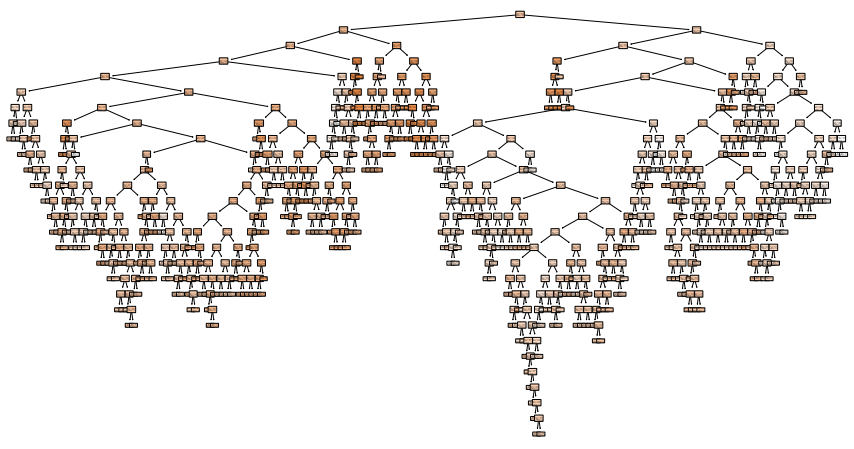

In [128]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(dt, filled=True , rounded=True)

#### Model Preparation:

In [1167]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [1168]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_squared_error(test_y,pred)))
    list_MSLE.append(abs(mean_squared_log_error(test_y,pred)))
    score=cross_val_score(model,x,y,cv=5,scoring='r2')
    #print('cross val score :',score,score.mean(),' standard deviation',score.std())
    cross_val_r2Score.append(score.mean())

In [1169]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
list_MSLE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('**********************************',k,'****************************************')
    max_r2_score(x_ss,y,0.25,i)

********************************** LinearRegression ****************************************
max r2_score : 0.3310084013854383 at random state 87
********************************** DecisionTree ****************************************
max r2_score : 0.37506562413377575 at random state 85
********************************** KNN ****************************************
max r2_score : 0.4121714294747514 at random state 80
********************************** Lasso ****************************************
max r2_score : 0.24111279581516432 at random state 79
********************************** Ridge ****************************************
max r2_score : 0.3310078966482698 at random state 87
********************************** ElasticNet ****************************************
max r2_score : -0.00043875578530339077 at random state 0
********************************** SVR ****************************************
max r2_score : 0.44593654981496544 at random state 46


In [1170]:
colv=['LinearReg','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE,list_MSLE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE','MS_log_error'],columns=colv)
performance_df

,LinearReg,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.331008,0.375066,0.412171,0.241113,0.331008,-0.000439,0.445937
cross_val_r2Score,0.307003,0.303643,0.376347,0.228200,0.307003,-0.000911,0.415166
MSE,0.287896,0.271555,0.257625,0.315238,0.287896,0.419430,0.243213
RMSE,0.536559,0.521110,0.507568,0.561461,0.536560,0.647635,0.493166
MAE,0.411090,0.398333,0.386863,0.438852,0.411090,0.516928,0.377106
MS_log_error,0.005853,0.005738,0.005216,0.006299,0.005853,0.008475,0.004913


Obs: Models are not overfitted

Best results are given by SVR till now with least MSE of 0.24 and highest r2 score of 45%

#### Tyring Hyperparameter tuning for SVR to check if that improve the score.

In [1175]:
# making a method to perform hyper tuning using MSE as the scoring metric
from sklearn.metrics import make_scorer
def gridsearch(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring='neg_mean_squared_error')
        grid_cv.fit(x,y)
        print('\n')   
        print('best mean score(MSE) :',abs(grid_cv.best_score_))
       
        print('best Parameter :',grid_cv.best_params_)
       

In [1176]:
gridsearch(x_ss,y,SVR(),{'C':[0.1,1,10],'kernel':["linear","rbf","poly"]})



best mean score(MSE) : 0.244933732719818
best Parameter : {'C': 1, 'kernel': 'rbf'}


Now finding score at best parameter

In [1178]:
max_r2_score(x_ss,y,0.25,SVR(C=1,kernel='rbf'))

max r2_score : 0.44593654981496544 at random state 46


OBS: MSE score is not improved

### Now trying ensemble techniques:

In [1180]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor


In [1183]:
############################  RandomForestRegressor ##########################
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
para_dict = {'n_estimators': [50,100,150,200],
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gridsearch(x_ss,y,RandomForestRegressor(),para_dict)



best mean score(MSE) : 0.15104398645950182
best Parameter : {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Now find model state at best parameters:

In [1193]:
max_r2_score(x_ss,y,0.25,RandomForestRegressor(bootstrap='True',max_features='auto',min_samples_leaf=2,min_samples_split=10,n_estimators=2000))

max r2_score : 0.6644288065946913 at random state 62


In [1189]:
para_dict={ 'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
gridsearch(x_ss,y,GradientBoostingRegressor(),para_dict)



best mean score(MSE) : 0.13930824854321217
best Parameter : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 2000, 'random_state': 1, 'subsample': 0.75}


In [1192]:
max_r2_score(x_ss,y,0.25,GradientBoostingRegressor(n_estimators=2000,learning_rate=0.1,max_depth=2,subsample=0.75))

max r2_score : 0.6886064885357481 at random state 48


In [1195]:
para_dict={ 'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'loss' : ['linear', 'square', 'exponential']}
gridsearch(x_ss,y,AdaBoostRegressor(),para_dict)



best mean score(MSE) : 0.2628513823095952
best Parameter : {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 2000}


####  Hence we can see that best score is given by GradientBoostingRegressor with mean MSE of 0.13 and r2_score 69%. Hence finalizing this model

In [1199]:
model=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.1,max_depth=2,subsample=0.75)
train_x,test_x,train_y,test_y=train_test_split(x_ss,y,test_size=0.25,random_state=48)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('r2_score :',r2_score(test_y,pred))
print('MSE :',mean_squared_error(test_y,pred))
print('RMSE :',np.sqrt(mean_squared_error(test_y,pred)))


r2_score : 0.6888744056598269
MSE : 0.13617748941430977
RMSE : 0.36902234270340567


In [1200]:
from sklearn.externals import joblib
joblib.dump(model,'Restaurant_food_predictor_model.obj')

['Restaurant_food_predictor_model.obj']

### Taking test data

In [1236]:
test_data=rest_data_coded.iloc[12690:,:]

#### Doing modifications on test data so that test data become same as the data on which our model was trained

In [1237]:
for i in test_data.columns:
    if(((test_data[i].skew())< -0.55) & (i!='COST')):
        test_data[i]=np.e**(test_data[i])
    if(((test_data[i].skew())> 0.55) & (i!='COST')):
        test_data[i]=(test_data[i])**(1/4)
test_data.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,Days
0,327,1307,73.699794,4.873262,1,5,54.59815,74,2.189939,2.871622,2.575510,2.140695,2.114743,1.96799,5.754603,1096.633158
1,281,417,66.686331,2.794682,1,23,54.59815,92,2.320596,2.971828,2.839412,2.140695,2.114743,1.96799,5.754603,1096.633158
2,281,760,44.701184,4.325308,1,5,54.59815,74,3.027400,1.934336,2.087798,2.140695,2.114743,1.96799,5.754603,1096.633158
3,132,1008,44.701184,6.165481,1,20,54.59815,15,2.258101,2.258101,2.213364,2.140695,2.114743,1.96799,5.754603,403.428793
4,221,557,36.598234,2.189939,1,23,54.59815,92,2.645751,2.258101,2.213364,2.140695,2.114743,1.96799,5.754603,1096.633158


In [1238]:
test_data.drop('COST',axis=1,inplace=True)
x_test_scaled=ss.transform(train_data)

In [1240]:
pd.DataFrame(x_test_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.401061,1.206723,1.510248,1.026217,-0.959435,-0.004255,0.757964,-0.582711,1.888497,2.277168,0.053899,-34.79039,-154.012603,-1.245397,0.314319
1,0.976740,-0.736746,1.189502,-0.748219,1.054619,-0.004255,1.373643,-0.245870,2.235847,3.944236,0.053899,-34.79039,-154.012603,-1.245397,0.314319
2,0.976740,0.012254,0.184058,0.558441,-0.959435,-0.004255,0.757964,1.576307,-1.360465,-0.803709,0.053899,-34.79039,-154.012603,-1.245397,0.314319
3,-0.397692,0.553805,0.184058,2.129354,0.718944,-0.004255,-1.260094,-0.406985,-0.238183,-0.010507,0.053899,-34.79039,-154.012603,-1.245397,-2.405070
4,0.423277,-0.431032,-0.186513,-1.264474,1.054619,-0.004255,1.373643,0.592397,-0.238183,-0.010507,0.053899,-34.79039,-154.012603,-1.245397,0.314319


In [1242]:
perdiction=joblib.load('Restaurant_food_predictor_model.obj').predict(x_test_scaled)

In [1245]:
##########   Taking anitlog of prediction since we have trained our model on log value of target value
predicted_food_cost=pd.DataFrame(np.e**perdiction)
predicted_food_cost

,0
0,957.579364
1,297.627365
2,636.883947
3,357.134286
4,214.346488
...,...
4226,786.737207
4227,494.670370
4228,363.430281
4229,254.999152


In [1246]:
predicted_food_cost.to_csv('predicted_food_cost.csv')